In [1]:
# Import
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
eng_vec = np.asarray([2, 1])
ita_vec = np.asarray([1, 2])

eng_vec = eng_vec / np.linalg.norm(eng_vec)
ita_vec = ita_vec / np.linalg.norm(ita_vec)

eng_vec
ita_vec

array([ 0.89442719,  0.4472136 ])

array([ 0.4472136 ,  0.89442719])

In [3]:
def read_T(T_fn):
    with open(T_fn, 'rb') as f:
        data = pickle.load(f)
    return data

def get_sing(T):
    U, s, V = np.linalg.svd(T, full_matrices=True, compute_uv=True)
    print('singular:')
    print(s)

def plot(v1, v2, T_fn):
    T = read_T(T_fn)
    
    print('T0:')
    print(T[0])
    get_sing(T[0])
    print('T1:')
    print(T[1])
    get_sing(T[1])
    
    plt.xlim(xmin=0.0)
    plt.xlim(xmax=1.0)
    plt.ylim(ymin=0.0)
    plt.ylim(ymax=1.0)
    
    plt.scatter(v1[0], v1[1], color='blue')
    plt.scatter(v2[0], v2[1], color='gold')
    plt.grid()
    plt.show()
    
#     plt.xlim(xmin=0.0)
#     plt.xlim(xmax=1.0)
#     plt.ylim(ymin=0.0)
#     plt.ylim(ymax=1.0)
    
    vt1 = np.dot(v1, T[0])
    vt2 = np.dot(v2, T[1])
    vt1 = vt1 / np.linalg.norm(vt1)
    vt2 = vt2 / np.linalg.norm(vt2)
    plt.scatter(vt1[0], vt1[1], color='blue')
    plt.scatter(vt2[0], vt2[1], color='gold')
    plt.grid()
    plt.show()
    
def map_points(vecs, T):    
    vecs_norm = vecs / np.sqrt((vecs ** 2).sum(1))[:, None]
    vecs_T = np.dot(vecs_norm, T)
    vecs_T_norm = vecs_T / np.sqrt((vecs_T ** 2).sum(1))[:, None]
    
    for i, row in enumerate(vecs_T_norm):
        print('{0}\t{1}\t{2}'.format(vecs[i], vecs_norm[i], vecs_T_norm[i]))
        
    plt.scatter(vecs_norm[:, 0], vecs_norm[:,1], color='green')
    plt.scatter(vecs_T_norm[:, 0], vecs_T_norm[:,1], color='red')
    plt.grid()
    plt.show()

[ 1.  0.]	[ 1.  0.]	[ 0.45833834  0.8887778 ]
[ 0.5  0.5]	[ 0.70710678  0.70710678]	[ 0.92394017  0.38253701]
[ 2.  1.]	[ 0.89442719  0.4472136 ]	[ 0.74007336  0.67252615]
[ 1.  2.]	[ 0.4472136   0.89442719]	[ 0.9977147  -0.06756762]


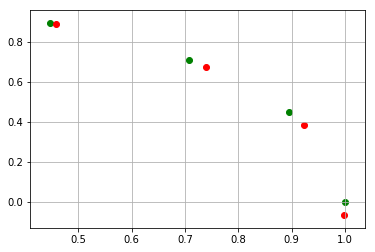



[ 1.  0.]	[ 1.  0.]	[-0.74810335 -0.66358223]
[ 0.5  0.5]	[ 0.70710678  0.70710678]	[-0.28946602  0.95718829]
[ 2.  1.]	[ 0.89442719  0.4472136 ]	[-0.8771601   0.48019804]
[ 1.  2.]	[ 0.4472136   0.89442719]	[-0.00918652  0.9999578 ]


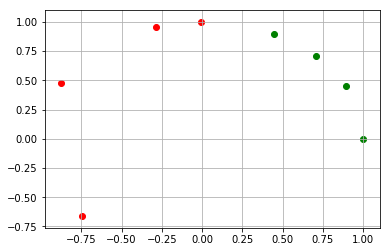



[ 1.  0.]	[ 1.  0.]	[-0.63603128 -0.77166328]
[ 0.5  0.5]	[ 0.70710678  0.70710678]	[-0.60488815 -0.79631044]
[ 2.  1.]	[ 0.89442719  0.4472136 ]	[-0.61545566 -0.78817151]
[ 1.  2.]	[ 0.4472136   0.89442719]	[-0.59413736 -0.8043636 ]


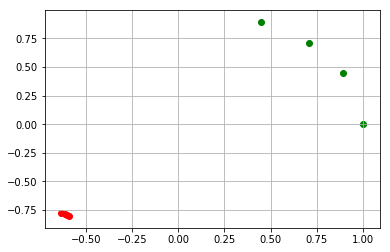

In [4]:
# With SVD 100 epochs
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1819_58/train_mod/T_99.pickle'
T = read_T(T_fn)
vecs = np.asarray([[1, 0],[0.5, 0.5],[2,1],[1,2]])
map_points(vecs, T[0])
print('\n')

# Wtihout SVD 100 epochs
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1832_25/train_mod/T_99.pickle'
T = read_T(T_fn)
vecs = np.asarray([[1, 0],[0.5, 0.5],[2,1],[1,2]])
map_points(vecs, T[0])
print('\n')

# Without SVD 1000 epochs
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1909_34/train_mod/T_999.pickle'
T = read_T(T_fn)
vecs = np.asarray([[1, 0],[0.5, 0.5],[2,1],[1,2]])
map_points(vecs, T[0])
print('\n')

T0:
[[ 0.74446648  0.72512084]
 [ 0.63790429 -0.71650845]]
singular:
[ 1.04482925  0.95324117]
T1:
[[ 0.76742983 -0.6849547 ]
 [ 0.68100715  0.70996165]]
singular:
[ 1.03485072  0.97724706]


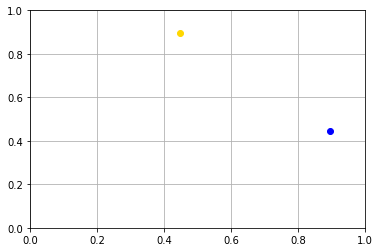

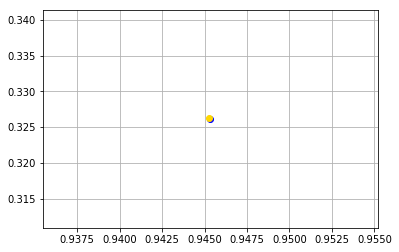

In [5]:
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1819_58/train_mod/T_10.pickle'
plot(eng_vec, ita_vec, T_fn)

T0:
[[-0.62343848 -0.55300206]
 [ 0.29933316  1.62473345]]
singular:
[ 1.7886889   0.47374895]
T1:
[[-1.54660714  1.33703363]
 [-0.02017647 -0.23412932]]
singular:
[ 2.04910278  0.18987955]


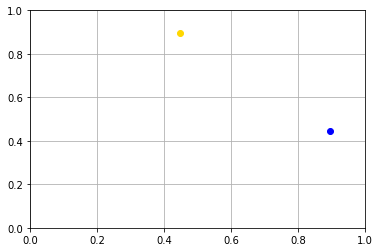

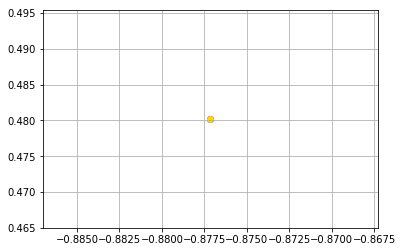

In [6]:
T_fn = '/mnt/permanent/home/eszti/dipterv/panlex/output/20180422_1832_25/train_mod/T_99.pickle'
plot(eng_vec, ita_vec, T_fn)